# Очистка золотосодержащей руды

Необходимо обучить модель для предсказания коэффициента восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

## Оглавление:
* [1. Подготовка данных](#1)
* [2. Анализ данных](#2)
* [3. Модель](#3)

# 1. Подготовка данных <a class="anchor" id="1"></a>

* 1.1. Откроем файлы и изучим их.

Импортируем библиотеки:

In [1]:
# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки math>
import math

# <импорт библиотеки sklearn>
import sklearn

# <Отключение предупреждений>
import warnings
warnings.filterwarnings('ignore')

# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки seaborn для построения графиков>
import seaborn as sns

# <импорт библиотеки matplotlib для построения графиков>
import matplotlib.pyplot as plt

# <увеличим количество отображаемых столбцов>
pd.set_option("display.max_columns", 87)

Прочитаем файлы с данными:

In [2]:
# <чтение файла с данными с сохранением в data_full>
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

# <чтение файла с данными с сохранением в data_train>
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')

# <чтение файла с данными с сохранением в data_test>
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

Рассмотрим информацию по датафреймам и их первые 5 строк:

In [3]:
# <рассмотрим датафрейм data_full>
print(data_full.info())
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
# <рассмотрим датафрейм data_train>
print(data_train.info())
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
# <рассмотрим датафрейм data_test>
print(data_test.info())
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

В тестовой выборке отсутствуют выходные параметры продукта для каждого этапа (флоатации, первичной и вторичной очистки).

В целом в данных присутствуют: 
* Параметры сырья, поступающего на флоатационную установку, параметры реагентов для этих установок, размер гранул, скорость подачи. 
* Уровень жидкости и объем воздуха для каждой флоатационной установки. 
* Выходные параметры продукта и отвальные хвосты после каждого этапа (флоатации, первичной и вторичной очистки).
* Некоторые расчетные характеристики.
* Эффективность обогащения чернового и финального концентрата.

Заполним пропуски в датасетах методом *.ffill*, он отлично подходит так как "Соседние по времени параметры часто похожи." - цитата из условия задачи.

In [6]:
# <Сначала заполним пропуски только у features>
data_full_target_rougher = data_full['rougher.output.recovery']
data_full_target_final = data_full['final.output.recovery']
data_full_features = data_full.drop(['final.output.recovery','rougher.output.recovery'], axis=1)
data_full_features.ffill(axis=0,inplace=True)

# <Затем добавим их обратно и сбросим пропуски у целевых.>
data_full_features['rougher.output.recovery'] = data_full_target_rougher
data_full_features['final.output.recovery'] = data_full_target_final
data_full_preprocessed = data_full_features.dropna()
data_full_preprocessed.reset_index(inplace=True, drop = True)

# <Сделаем также на обучающей выборке.>
data_train_target_rougher = data_train['rougher.output.recovery']
data_train_target_final = data_train['final.output.recovery']
data_train_features = data_train.drop(['final.output.recovery','rougher.output.recovery'], axis=1)
data_train_features.ffill(axis=0,inplace=True)
data_train_features['rougher.output.recovery'] = data_train_target_rougher
data_train_features['final.output.recovery'] = data_train_target_final
data_train_preprocessed = data_train_features.dropna()
data_train_preprocessed.reset_index(inplace=True, drop = True)

# <На тестовой все проще.>
data_test_preprocessed = data_test.ffill(axis=0)

Добавим в тестовую выборку данные целевых признаков из полного датасета:

In [7]:
data_test_preprocessed = data_test_preprocessed.merge(right = data_full_preprocessed[['final.output.recovery','date']], how='left', on='date')
data_test_preprocessed = data_test_preprocessed.merge(right = data_full_preprocessed[['rougher.output.recovery','date']], how='left', on='date')
data_test_preprocessed = data_test_preprocessed.dropna()

Сбросим столбец даты - для обучения модели он нам не понадобится.

In [8]:
data_test_preprocessed = data_test_preprocessed.drop(['date'], axis=1)
data_train_preprocessed = data_train_preprocessed.drop(['date'], axis=1)

* 1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

In [9]:
# <Импортируем среднюю абсолютную ошибку>
from sklearn.metrics import mean_absolute_error

Рассчитаем эффективность обогащения:

In [10]:
data_train_target_rougher_check = []
for_check_recovery = data_train_preprocessed['rougher.output.recovery']

for row in range(data_train_preprocessed.shape[0]):
    Recovery = 0
    C_fraction = data_train_preprocessed['rougher.output.concentrate_au'][row]
    F_fraction = data_train_preprocessed['rougher.input.feed_au'][row]
    T_fraction = data_train_preprocessed['rougher.output.tail_au'][row]
    
    Recovery = ((C_fraction * (F_fraction - T_fraction))/(F_fraction * (C_fraction - T_fraction)))*100
    if not (math.isnan(Recovery) or (Recovery < 0)):
        data_train_target_rougher_check.append(Recovery)
    else:
        data_train_target_rougher_check.append(math.nan)
        for_check_recovery.loc[row] = math.nan
        

data_train_target_rougher_check = pd.Series(data_train_target_rougher_check)
for_check_recovery.dropna(inplace=True)
data_train_target_rougher_check.dropna(inplace=True)
data_train_target_rougher_check.reset_index(inplace=True, drop = True)
for_check_recovery.reset_index(inplace=True, drop = True)

In [11]:
print('MAE:',mean_absolute_error(data_train_target_rougher_check,for_check_recovery))

MAE: 9.46896498277233e-15


Ошибка крайне мала, ненулевой она является по причине того что мы заполняли пропуски не самым идеальным методом.

### Вывод

* Мы осмотрели данные и смогли осознать процесс очистки золотосодержащей руды. Важно погружаться в предметную область перед анализом и созданием предсказательной модели.
* Мы заполнили пропуски в данных и сбросили строки с отсутствующим целевым признаком, так как такие данные нам не пригодятся для проверки и обучения модели.
* В тестовой выборке мы обнаружили отсутствие выходных параметров продукта. Вполне возможно нам придется их предсказывать или мы заполним их из датасета *data_full*.
* Мы подсчитали эффективность обогащения на обучающей выборке, данный пункт показал нам что целевой признак подсчитан верно.

# 2. Анализ данных <a class="anchor" id="2"></a>

* 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы.

Построим графики изменения концентрации металлов на разных этапах очистки.

In [12]:
# <Создадим датафреймы, которые будем использовать для исследования изменений концентрации металлов>
au_con = data_full[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
ag_con = data_full[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
pb_con = data_full[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

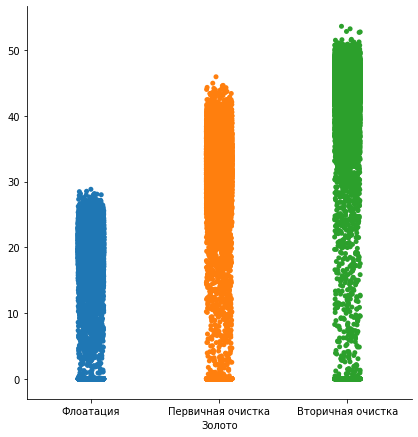

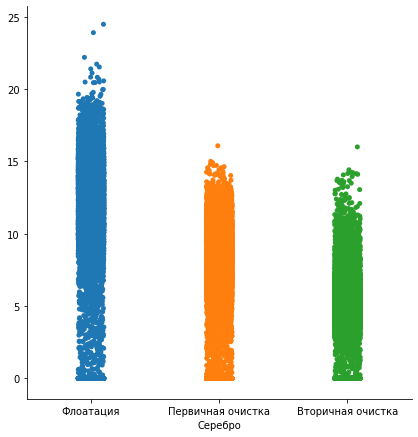

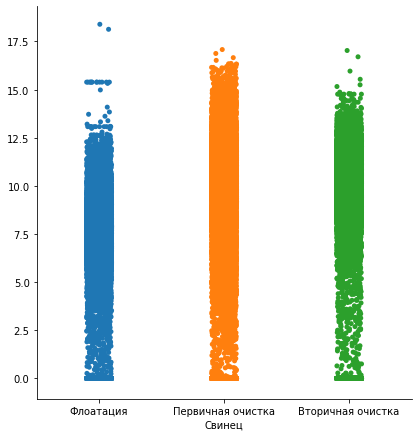

In [13]:
g = sns.catplot(data=au_con, height = 6)
g.set_xticklabels(['Флоатация','Первичная очистка','Вторичная очистка'])
g.set_axis_labels('Золото')
r = sns.catplot(data=ag_con, height = 6)
r.set_axis_labels('Серебро')
r.set_xticklabels(['Флоатация','Первичная очистка','Вторичная очистка'])
y = sns.catplot(data=pb_con, height = 6)
y.set_axis_labels('Свинец')
y.set_xticklabels(['Флоатация','Первичная очистка','Вторичная очистка'])

Ожидаемо что после каждого этапа очистки доля золота увеличивается. Доля серебра уменьшается, а свинец имеет примерно ту же долю в концентрате. Но учитвая что доля золота существенно увеличивается ближе к финальному концентрату, можно утверждать что фактическое количество свинца существенно уменьшается. Просто его доля велика из-за уменьшения доли других веществ.

* 2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Построим скрипичные диаграммы для сравнения распределения размеров гранул на обучающей и тестовой выборке. Первый график - размер гранул перед флоатацией, второй - перед первичной очисткой.

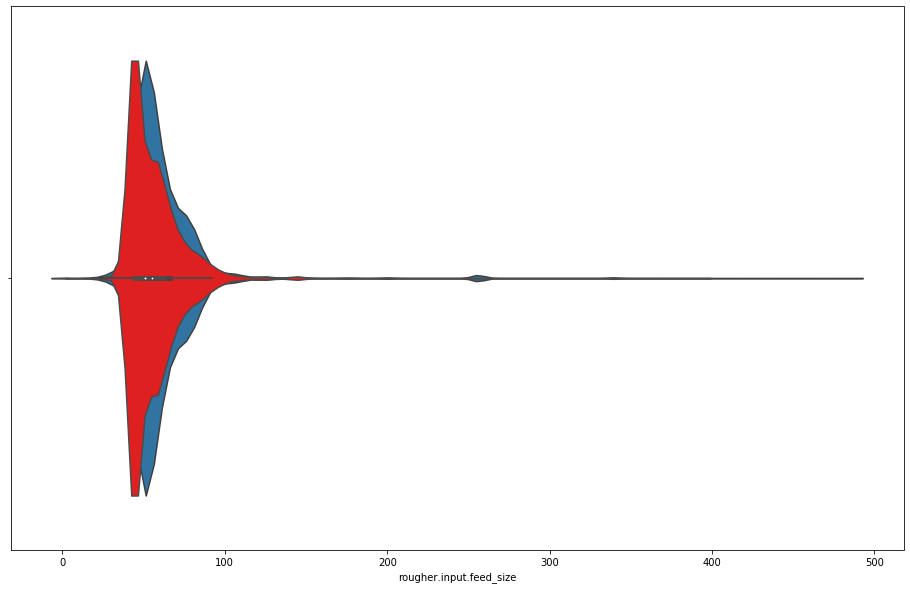

In [14]:
plt.figure(figsize=(16, 10))
# <Построим cкрипичныйе диаграммы с помощью билиотеки seaborn>
sns.violinplot(data_train_preprocessed['rougher.input.feed_size'])
sns.violinplot(data_test_preprocessed['rougher.input.feed_size'],color='red')

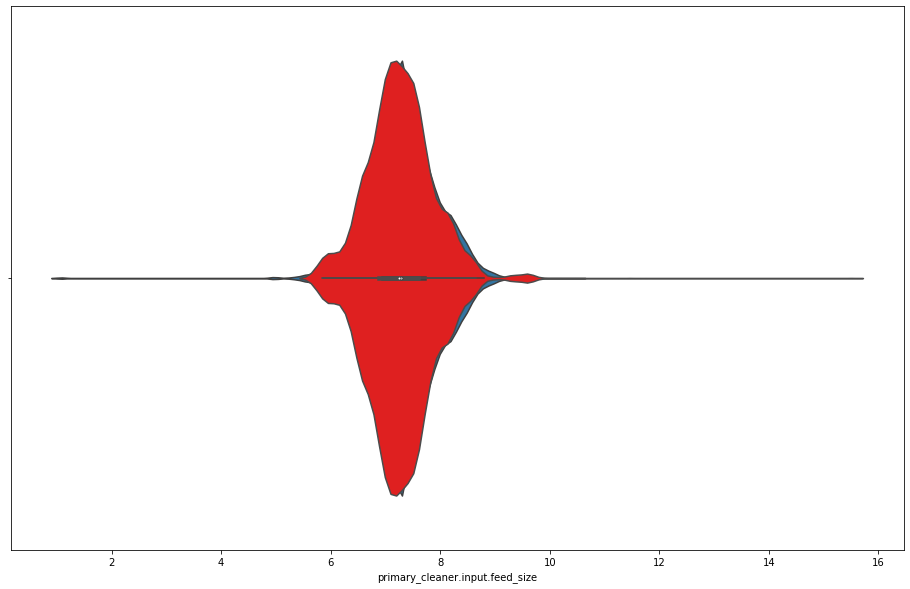

In [15]:
plt.figure(figsize=(16, 10))
sns.violinplot(data_train_preprocessed['primary_cleaner.input.feed_size'])
sns.violinplot(data_test_preprocessed['primary_cleaner.input.feed_size'],color='red')

Распределения отличаются друг от друга не настолько сильно, что бы это повлияло на оценку модели на тестовой выборке.

* 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Есть ли аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишем выводы и удалим аномалии.

Построим гистограммы распределения для суммарных концентраций всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:

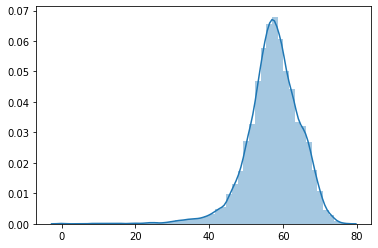

In [16]:
# <Сырье>
sum_concentrat_rougher_input = data_full_preprocessed['rougher.input.feed_ag']+ \
data_full_preprocessed['rougher.input.feed_pb']+\
data_full_preprocessed['rougher.input.feed_au']+\
data_full_preprocessed['rougher.input.feed_sol']
sns.distplot(sum_concentrat_rougher_input)

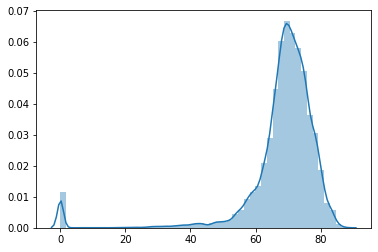

In [17]:
# <Черновой концентрат>
sum_concentrat_rougher_output = data_full_preprocessed['rougher.output.concentrate_ag']+ \
data_full_preprocessed['rougher.output.concentrate_pb']+\
data_full_preprocessed['rougher.output.concentrate_au']+\
data_full_preprocessed['rougher.output.concentrate_sol']
sns.distplot(sum_concentrat_rougher_output)

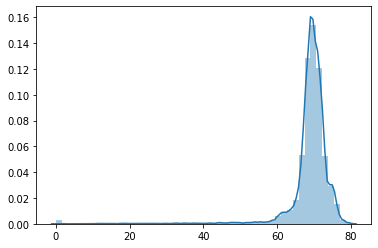

In [18]:
# <Финальный концентрат>
sum_concentrat_final_output = data_full_preprocessed['final.output.concentrate_ag']+ \
data_full_preprocessed['final.output.concentrate_pb']+\
data_full_preprocessed['final.output.concentrate_au']+\
data_full_preprocessed['final.output.concentrate_sol']
sns.distplot(sum_concentrat_final_output)

Я делаю вывод что основные аномалии это нулевые значения, близкие к нулю значения. И это было заметно еше на стадии изучения данных и подсчета эффективности обогащения.

Используем метод **Изолирующий лес** для поиска аномалий, *contamination* - доля данных которыми мы готовы пожертвовать:

In [1]:
# <импортируем алгоритм>
from sklearn.ensemble import IsolationForest

Найдем аномалии для обучающей выборки:

In [20]:
# <выберем столбцы, в которых подозреваем аномалии>
for_outliers_1 = data_train_preprocessed[['final.output.concentrate_au','final.output.concentrate_ag',\
                                          'final.output.concentrate_pb','final.output.concentrate_sol',\
                                          'rougher.input.feed_au','rougher.input.feed_ag',\
                                          'rougher.input.feed_pb','rougher.input.feed_sol',\
                                          'rougher.output.concentrate_au','rougher.output.concentrate_ag',\
                                          'rougher.output.concentrate_pb','rougher.output.concentrate_sol']]

In [21]:
# <обучим модель, ее предсказания - метки для аномалий/ не аномалий>
to_model_columns = for_outliers_1.columns

clf=IsolationForest(contamination=float(.041), random_state=42)

clf.fit(data_train_preprocessed[to_model_columns])
pred = clf.predict(data_train_preprocessed[to_model_columns])
data_train_preprocessed['anomaly']=pred
train_wo_outliers=data_train_preprocessed.loc[data_train_preprocessed['anomaly']==1]

Повторим тоже самое для тестовой выборки.

In [22]:
for_outliers_2 = data_train_preprocessed[['rougher.input.feed_au','rougher.input.feed_ag',\
                                          'rougher.input.feed_pb','rougher.input.feed_sol',\
                                         ]]

In [23]:
to_model_columns = for_outliers_2.columns

clf=IsolationForest(contamination=float(.01), random_state=42)

clf.fit(data_test_preprocessed[to_model_columns])
pred = clf.predict(data_test_preprocessed[to_model_columns])
data_test_preprocessed['anomaly']=pred
test_wo_outliers=data_test_preprocessed.loc[data_test_preprocessed['anomaly']==1]

Удалим столбец *anomaly* у обоих датафреймов.

In [24]:
test_wo_outliers = test_wo_outliers.drop(['anomaly'], axis=1)
train_wo_outliers = train_wo_outliers.drop(['anomaly'], axis=1)

In [25]:
test_wo_outliers.reset_index(inplace=True, drop = True)
train_wo_outliers.reset_index(inplace=True, drop = True)

### Вывод

* Мы проанализировали как меняется концентрация металлов на разных этапах очистки, и пришли к выводу что доля золота увелчивается, доля серебра уменьшается, и доля свинца уменьшается тоже, хотя по графику сразу и не скажешь.
* Мы оценили распределения размеров гранул на обучающей и тестовой выборке и пришли к выводу что они различаются не слишком сильно, и это не слишком повлияет на оценку модели.
* Мы исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Пришли к выводу что в данных есть аномалии и избавились от них.

# 3. Модель <a class="anchor" id="3"></a>

Разделим обучающий датасет на фичи и целевые признаки.

In [26]:
# <Разделим датафрейм на features и target - целевой признак>
target_train = train_wo_outliers[['rougher.output.recovery','final.output.recovery']]
features_train = train_wo_outliers[test_wo_outliers.columns].drop(['final.output.recovery','rougher.output.recovery'], axis=1)

* 3.1. Напишем функцию для вычисления итоговой sMAPE.

Напишем функцию вычисления ошибки *sMAPE*:

In [139]:
def fast_smape(x,y):
    #<сбросим индексы у таргета, так как он приходит с различными индексами из-за кросс-валидации>
    x.reset_index(inplace=True, drop = True)
    y = pd.DataFrame(y)
    smape_rougher_list = (abs(x["rougher.output.recovery"] - y[0]))/(abs(x["rougher.output.recovery"] + y[0])/2)*100
    smape_final_list = (abs(x["final.output.recovery"] - y[1]))/(abs(x["final.output.recovery"] + y[1])/2)*100
        
    smape_final = sum(smape_final_list)/len(x)
    smape_rougher = sum(smape_rougher_list)/len(x)
    
    return (float(0.25*smape_rougher + 0.75*smape_final)) 

* 3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.

Обучим и оценим модель линейной регрессии:

In [28]:
from sklearn.linear_model import LinearRegression

In [88]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [140]:
smape = make_scorer(fast_smape,greater_is_better=False )

In [112]:
model = LinearRegression()
cv_results = cross_validate(model, features_train, target_train, cv=4,scoring=smape)
cv_results['test_score'].mean()

-9.895609812550193

Обучим и оценим модель дерева принятия решений:

In [115]:
# <Импортируем метод дерева принятия решений>
from sklearn.tree import DecisionTreeRegressor
# <импортируем алгоритм случайного поиска по гиперпараметрам>
from sklearn.model_selection import RandomizedSearchCV

Пользоваться буду RandomizedSearchCV, перебирать параметры исчерпывающим поиском занимает слишком долгое время,  как это делать - я представляю:

In [141]:
%%time
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10]
}

# <дерево принятия решений к которому будем подбирать параметры>
estimator = DecisionTreeRegressor(random_state = 12345)

# <модель>
model = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = smape)

# <обучаем модель> 
model.fit(features_train, target_train)

# <среднее значение smape>
model.best_score_

CPU times: user 14.2 s, sys: 0 ns, total: 14.2 s
Wall time: 14.6 s


-9.485320500707578

In [142]:
# <лучшие гиперпараметры>
model.best_params_

{'min_samples_split': 2,
 'max_leaf_nodes': 40,
 'max_features': 'auto',
 'max_depth': 18}

Обучим и оценим модель случайного леса:

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'n_estimators': list(np.arange(2, 101, 2).astype(int)),
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# <случайный лес к которому будем подбирать параметры>
estimator = RandomForestRegressor(random_state = 12345)

# <модель>
model_rf = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = smape)

# <обучаем модель> 
model_rf.fit(features_train, target_train)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [154]:
# <среднее значение smape>
model_rf.best_score_

-8.735298939328233

In [155]:
# <лучшие гиперпараметры>
model_rf.best_params_

{'n_estimators': 96,
 'min_samples_split': 2,
 'max_leaf_nodes': 40,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

Лучшая модель - случайный лес. Проверим ее на тестовой выборке.

In [156]:
# <Разделим датафрейм на features и target - целевой признак>
target_test = test_wo_outliers[['rougher.output.recovery','final.output.recovery']]
features_test = test_wo_outliers.drop(['final.output.recovery','rougher.output.recovery'], axis=1)

In [158]:
%%time
predictions = model_rf.predict(features_test)
predictions = pd.DataFrame(predictions)
print('sMAPE =','{:.4f}'.format(fast_smape(target_test, predictions)))

sMAPE = 8.3226
CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 84.4 ms


### Вывод

* Мы написали функцию для вычисления итоговой sMAPE.
* Обучили разные модели и оценили их качество кросс-валидацией. Выбрали лучшую модель и проверили её на тестовой выборке.
* Изучая вопрос с оценками, узнал что вроде можно использовать свои для методов подборов гиперпараметров, есть куда стремиться.